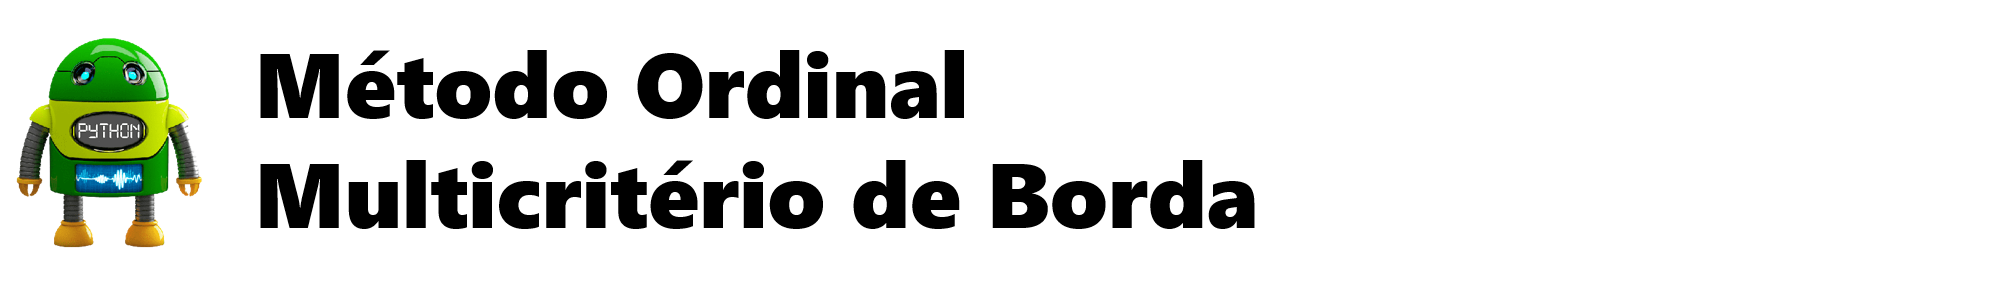

---
### **Autor: Onédio Siqueira SEABRA Junior**
### **GitHub: [https://github.com/onediojunior/pesquisaoperacional](https://github.com/onediojunior/pesquisaoperacional)**
### **Linkedin: [https://www.linkedin.com/in/onediojunior/](https://www.linkedin.com/in/onediojunior/)**
### **Versão 1.0 - 14 FEV 22**
---

## **&#10096; VISÃO GERAL &#10097;**

## &#9776; **DESCRIÇÃO**
---
O **Método Ordinal Multicritério de Borda** foi proposto por Jean Charles de Borda (1773–1799), sendo um método que utiliza uma escala ordinal.

É um método simples, de fácil implementação, que atende a necessidade de apresentação de resultados baseados em critério de seleção.

A sua implementação é realizada da seguinte forma:

***As alternativas ganham uma ordenação por meio de pontuação. Consiste então em se atribuir 1 ponto à alternativa "mais preferida ", 2 pontos à "segunda na preferência", e assim sucessivamente até a última alternativa. Ao final, estes pontos são somados e a alternativa que obtiver menor pontuação é a escolhida.***

## &#9776; **VÍDEO SOBRE CONCEITUAÇÃO DE MÉTODOS ORDINAIS E CARDINAIS**
---

In [2]:
from IPython.core.display import display, HTML
display(HTML('<p> Para visualizar o vídeo sobre este assunto, clique na imagem abaixo.</p><br/>'))
display(HTML('<a style="" href="https://www.youtube.com/watch?v=xnLfwP2mjT8" target="_blank"><img width="300" \
src="https://i.postimg.cc/Hs4dbW8Y/youtube.png"/></a>'))
display(HTML('<br/>'))

## &#9776; **SLIDES**
---

In [3]:
display(HTML('<h2> Slides Método Ordinal Multicritério de Borda</h2><br/>'))
display(HTML('<a title="Baixar slide" href="https://www.youtube.com/watch?v=xnLfwP2mjT8" target="_blank">\
<img src="https://i.postimg.cc/SxPFdd0r/po-metodo-borda.png"/></a>'))

Ao realizar qualquer análise de dados, é de suma importância reconhecer e entender o contexto ao qual o negócio está enquadrado. 

## &#9776; **CENÁRIO PROBLEMA**
---

Você resolveu adquirir um imóvel na cidade do Rio de Janeiro, em Copacabana, porém ainda tem dúvidas sobre qual imóvel irá escolher, pois a quantidade de imóveis informados por seu corretor é bem maior que o número mágico que seriam 7. Entretanto, como bom Cientista de Dados e conhecedor de métodos ligados a Pesquisa Operacional, resolveu dar um ponto final ao seu problema adotando o Método de Borda.

A solução do cenário apresentado, será desenvolvida com o emprego da metodologia da Descoberta de Conhecimento em Bases de Dados — KDD para tratamento dos dados e com o uso da linguagem Python para desenvolvimento do algoritmo baseado no Método de Borda. 

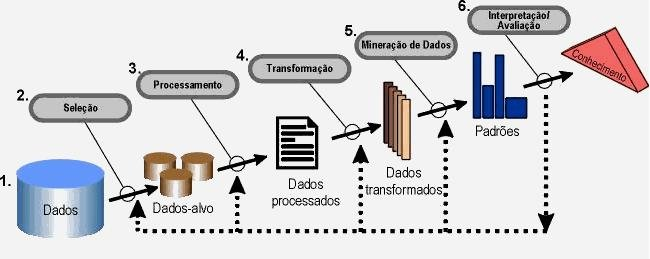

## &#9776; **PREPARAÇÃO DO AMBIENTE**
---

### &#10074; **IMPORTAR BIBLIOTECAS**

As seguintes bibliotecas serão necessárias para a preparação e visualização dos dados neste projeto.

In [4]:
try:
  # carregamento das bibliotecas iniciais
  import pandas as pd
  import numpy as np
  
  # Ignorar warnings
  import warnings
  warnings.filterwarnings("ignore")

  print("Bibliotecas carregadas")
except:
  print("Problemas ao carregar bibliotecas")

Bibliotecas carregadas


### &#10074; **CONFIGURAR VISUALIZAÇÃO PARA VISUALIZAÇÃO DOS GRÁFICOS E TABELAS**

As seguintes definições de parâmetros facilitarão a visualização dos gráficos e tabelas.

In [5]:
try:
  # bibliotecas para visualização
  import matplotlib.pyplot as plt
  import seaborn as sns

  # maximiniza o número de colunas e linhas para impressão quando do uso da função head() do Pandas
  pd.options.display.max_columns = 200
  pd.options.display.max_rows = 200

  # Configurar a visualização
  %matplotlib inline
  plt.style.use( 'ggplot' )
  plt.rcParams['figure.figsize'] = (15,6)
  plt.subplots_adjust(wspace = 1.5)
  sns.set_style( 'white' )
  print("Bibliotecas carregadas")
except:
  print("Problemas ao carregar bibliotecas")

Bibliotecas carregadas


<Figure size 1080x432 with 0 Axes>

## **&#10096; MÉTODO KDD &#10097;**

## &#9776; **SELEÇÃO DOS DADOS**
---

A etapa de seleção é a primeira etapa do KDD, é uma etapa muito importante, pois é nela que serão decididos qual(is) o(s) conjunto(s) de dados que será(ão) relevantes para que sejam obtidos resultados com informações uteis.
Abaixo, iremos construir o nosso dataset que será utilizado para a resolução do cenário proposto.

In [6]:
# criando o dataset para o cenário

df = pd.DataFrame ({
    'id_imovel' : [1,2,3,4,5,6,7,8,9,10],
    'qtd_quartos' : [2,2,3,3,3,4,2,2,4,2],
    'qtd_banheiros' : [1,1,2,2,3,1,2,2,3,2],
    'play_ground' : ['sim','sim','não','sim','sim','não','sim','sim','não','sim'],
    'distancia_metro' : [10,20,20,35,14,80,90,10,15,100],
    'preco' : [800000,5000000, 65000000,785000,1220000,450000,980000,695000,898000,580000]
    })

In [7]:
# criando o dataset para o cenário

df_dictdata = pd.DataFrame({
    'Funcionalidade' : ['Identificação do imóvel','Quantidade de quartos no imóvel','Quantidade de banheiros no imóvel','Existência de playground no imóvel','Distância a estação de mêtro mais próximo','Valor anunciado para venda'],
    'Lista de colunas' : ['id_imovel','qtd_quartos','qtd_banheiros','play_ground','distancia_metro','preco'],
    'Descrição' : ['Número para identificação do imóvel','Número de quartos existentes no imóvel (tipo numérico discreto)','Número de banheiros existentes no imóvel (tipo numérico discreto)',
                   'Identifica existência de playground no imóvel com valor de sim ou não','Distância em metros do imóvel até a estação mais próxima','valor anunciado para venda (tipo numérico contínuo'] 
})

In [8]:
# apresenta o dataset e seu dicionário de dados
print("DADOS RECEBIDOS DO CORRETOR")
display(df.head())
print("\nDICIONÁRIO DE DADOS")
display(df_dictdata.head())

DADOS RECEBIDOS DO CORRETOR


,id_imovel,qtd_quartos,qtd_banheiros,play_ground,distancia_metro,preco
0,1,2,1,sim,10,800000
1,2,2,1,sim,20,5000000
2,3,3,2,não,20,65000000
3,4,3,2,sim,35,785000
4,5,3,3,sim,14,1220000



DICIONÁRIO DE DADOS


,Funcionalidade,Lista de colunas,Descrição
0,Identificação do imóvel,id_imovel,Número para identificação do imóvel
1,Quantidade de quartos no imóvel,qtd_quartos,Número de quartos existentes no imóvel (tipo n...
2,Quantidade de banheiros no imóvel,qtd_banheiros,Número de banheiros existentes no imóvel (tipo...
3,Existência de playground no imóvel,play_ground,Identifica existência de playground no imóvel ...
4,Distância a estação de mêtro mais próximo,distancia_metro,Distância em metros do imóvel até a estação ma...


In [9]:
# tira uma cópia do DataFrame (df)
df_imoveis = df.copy()

## &#9776; **PROCESSAMENTO**
---

Esta segunda etapa do KDD é onde acontece a verificação da qualidade dos dados armazenados. A base passa por um processo de limpar, corrigir ou remover dados inconsistentes, verificar dados ausentes ou incompletos, identificar anomalias (outliers).

Para identificar esses problemas, usamos várias ferramentas que são comumente usadas na análise exploratória de dados (EDA): estatística descritiva e visualização. Combinamos essas ferramentas com a nossa compreensão do contexto de negócios.

### &#10074; **VERIFICANDO OS NOMES DOS ATRIBUTOS DO DATAFRAME**

In [10]:
df_imoveis.columns

Index(['id_imovel', 'qtd_quartos', 'qtd_banheiros', 'play_ground',
       'distancia_metro', 'preco'],
      dtype='object')

### &#10074; **VERIFICANDO OS TIPOS DE DADOS PRESENTES NOS ATRIBUTOS**

In [11]:
df_imoveis.dtypes

id_imovel           int64
qtd_quartos         int64
qtd_banheiros       int64
play_ground        object
distancia_metro     int64
preco               int64
dtype: object

### &#10074; **VERIFICANDO A EXISTÊNCIA DE DADOS NULOS NO DATASET**

In [12]:
# verificando ausência de dados presentes no DataFrameData
df_imoveis.isna().any().any()

False

### &#10074; **VERIFICANDO A EXISTÊNCIA DE ERROS NO DATAFRAME**

In [13]:
colunas = df_imoveis.columns
for coluna in colunas:
  valores = df_imoveis[f"{coluna}"].unique()
  print(f"Atributo : {coluna}")
  print(f"Valores : {valores}")
  print("="*50)

Atributo : id_imovel
Valores : [ 1  2  3  4  5  6  7  8  9 10]
Atributo : qtd_quartos
Valores : [2 3 4]
Atributo : qtd_banheiros
Valores : [1 2 3]
Atributo : play_ground
Valores : ['sim' 'não']
Atributo : distancia_metro
Valores : [ 10  20  35  14  80  90  15 100]
Atributo : preco
Valores : [  800000  5000000 65000000   785000  1220000   450000   980000   695000
   898000   580000]


### &#10074; **VERIFICANDO PRESENÇA DE OUTLIERS NO DATAFRAME**

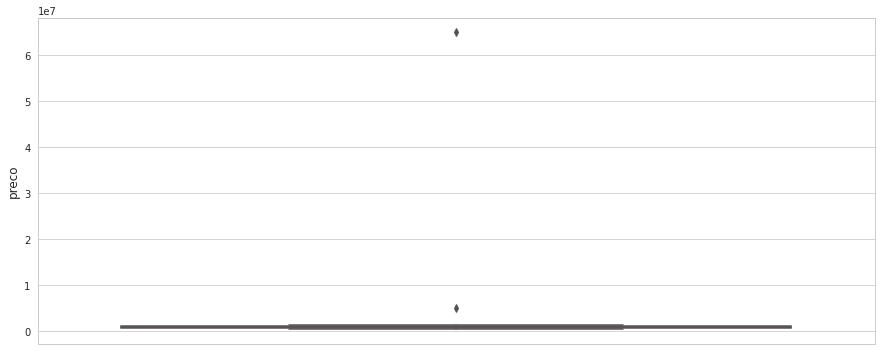

In [14]:
# transformando o atributo preco de int64 para float64
df_imoveis['preco'] = df_imoveis['preco'].astype('float64')

# gera o boxplot dos precos
sns.set_style("whitegrid")
sns.boxplot(y='preco', data=df_imoveis)
plt.show()

## &#9776; **TRANSFORMAÇÃO**
---

A etapa de transformação ou formatação dos dados analisa os dados obtidos da etapa anterior e os reorganiza de uma forma especifica para que possam ser interpretados na etapa seguinte.

Portanto, iremos dar uma organização nos dados para que na próxima etapa possamos passar os dados pelo Método de Borda.

### &#10074; **TRANSFORMANDO OS DADOS CATEGÓRICOS EM NUMÉRICOS**

In [15]:
# transformando o atributo categórico play_ground
# sim receberá 1 e não receberá 0
df_imoveis.loc[df_imoveis['play_ground'] == 'sim', 'play_ground'] = 1
df_imoveis.loc[df_imoveis['play_ground'] == 'não', 'play_ground'] = 0

In [16]:
df_imoveis.head(10)

,id_imovel,qtd_quartos,qtd_banheiros,play_ground,distancia_metro,preco
0,1,2,1,1,10,800000.0
1,2,2,1,1,20,5000000.0
2,3,3,2,0,20,65000000.0
3,4,3,2,1,35,785000.0
4,5,3,3,1,14,1220000.0
5,6,4,1,0,80,450000.0
6,7,2,2,1,90,980000.0
7,8,2,2,1,10,695000.0
8,9,4,3,0,15,898000.0
9,10,2,2,1,100,580000.0


### &#10074; **RENOMEANDO OS NOMES DOS ATRIBUTOS**

In [17]:
# renomeando os nomes dos índices do DataFrame
indices = []
for valor in df_imoveis['id_imovel']:
  indices.append(f"Imóvel {valor}")
df_imoveis.set_index(pd.Index(indices), inplace=True)

In [18]:
df_imoveis.head(10)

,id_imovel,qtd_quartos,qtd_banheiros,play_ground,distancia_metro,preco
Imóvel 1,1,2,1,1,10,800000.0
Imóvel 2,2,2,1,1,20,5000000.0
Imóvel 3,3,3,2,0,20,65000000.0
Imóvel 4,4,3,2,1,35,785000.0
Imóvel 5,5,3,3,1,14,1220000.0
Imóvel 6,6,4,1,0,80,450000.0
Imóvel 7,7,2,2,1,90,980000.0
Imóvel 8,8,2,2,1,10,695000.0
Imóvel 9,9,4,3,0,15,898000.0
Imóvel 10,10,2,2,1,100,580000.0


### &#10074; **ELIMINANDO OS ATRIBUTOS SEM VALOR**

In [19]:
# excluindo o atributo id_imovel
df_imoveis.drop("id_imovel", axis=1, inplace=True)

In [20]:
df_imoveis.head(10)

,qtd_quartos,qtd_banheiros,play_ground,distancia_metro,preco
Imóvel 1,2,1,1,10,800000.0
Imóvel 2,2,1,1,20,5000000.0
Imóvel 3,3,2,0,20,65000000.0
Imóvel 4,3,2,1,35,785000.0
Imóvel 5,3,3,1,14,1220000.0
Imóvel 6,4,1,0,80,450000.0
Imóvel 7,2,2,1,90,980000.0
Imóvel 8,2,2,1,10,695000.0
Imóvel 9,4,3,0,15,898000.0
Imóvel 10,2,2,1,100,580000.0


## &#9776; **MINERAÇÃO DE DADOS**

Nesta etapa, construímos modelos ou aplicamos técnicas de mineração de dados. Essas técnicas têm por objetivo (1) verificar uma hipótese, (2) descobrir novos padrões de forma autônoma. Além disso, a descoberta pode ser dividida em: preditiva e descritiva.

### &#10074; **ANÁLISE DESCRITIVA DE NOSSOS DADOS**

In [21]:
df_imoveis.describe()

,qtd_quartos,qtd_banheiros,distancia_metro,preco
count,10.000000,10.000000,10.000000,1.000000e+01
mean,2.700000,1.900000,39.400000,7.640800e+06
std,0.823273,0.737865,35.935745,2.019823e+07
min,2.000000,1.000000,10.000000,4.500000e+05
25%,2.000000,1.250000,14.250000,7.175000e+05
50%,2.500000,2.000000,20.000000,8.490000e+05
75%,3.000000,2.000000,68.750000,1.160000e+06
max,4.000000,3.000000,100.000000,6.500000e+07


### &#10074; **CRIANDO O ALGORiTMO MÉTODO DE BORDA**

In [22]:
ESCALA_AVALIACAO = {'escala_de_avaliacao' : ['Absolutamente melhor','Muito Melhor', 'Melhor',
                                             'Equivalente','Pior','Muito Pior','Absolutamente Pior'],
                    'nota' : [1,2,3,4,5,6,7]}
df_avaliacao = pd.DataFrame(data = ESCALA_AVALIACAO)

In [ ]:
df_avaliacao.head(7)

,escala_de_avaliacao,nota
0,Excelente,1
1,Muito Bom,2
2,Bom,3
3,Neutro/Indiferente,4
4,Ruim,5
5,Muito Ruim,6
6,Péssimo,7


In [ ]:
# cria a função para obter as opções de max e min por critério
def obterMaxMinCriterio(df):
  opcoes=list()
  atributos = df.columns
  for atributo in atributos:
    resp = input(f"Variável [{atributo}] (MIN | MAX) : ").upper().strip()
    opcoes.append(resp)
  df_opcaoMaxMinCriterio = pd.DataFrame(data={'variavel':atributos,'opcao':opcoes})
  return df_opcaoMaxMinCriterio

In [ ]:
df_opcaoMaxMinCriterio = obterMaxMinCriterio(df_imoveis)

Variável [qtd_quartos] (MIN | MAX) : MAX
Variável [qtd_banheiros] (MIN | MAX) : MAX
Variável [play_ground] (MIN | MAX) : MAX
Variável [distacia_metro] (MIN | MAX) : MIN
Variável [preco] (MIN | MAX) : MIN


In [ ]:
df_opcaoMaxMinCriterio.head()

,variavel,opcao
0,qtd_quartos,MAX
1,qtd_banheiros,MAX
2,play_ground,MAX
3,distacia_metro,MIN
4,preco,MIN


In [ ]:
def gerarMatrizBorda(df, df_avaliacao, df_opcaoMaxMinCriterio):
  atributos = df.columns
  for atributo in atributos:
    cont = 0
    opcao_maxmin_criterio = df_opcaoMaxMinCriterio.query("variavel == @atributo").iloc[0,1]
    ordenacao = False if opcao_maxmin_criterio == 'MAX' else True
    valores_ordenados = df[atributo].sort_values(ascending=ordenacao).unique()
    for valor in valores_ordenados:
      if cont < 7:
        df.loc[df[atributo] == valor,atributo] = int(df_avaliacao.at[cont,'nota'])
      else:
        df.loc[df[atributo] == valor,atributo] = 7 if opcao_maxmin_criterio == 'MAX' else 1
      cont +=1
  return df.astype('int64')

In [ ]:
df_matriz_borda = gerarMatrizBorda(df_imoveis,df_avaliacao,df_opcaoMaxMinCriterio)

In [ ]:
df_matriz_borda

,qtd_quartos,qtd_banheiros,play_ground,distacia_metro,preco
Imóvel 1,3,3,1,1,5
Imóvel 2,3,3,1,4,1
Imóvel 3,3,2,2,4,1
Imóvel 4,3,2,1,5,4
Imóvel 5,3,3,1,2,1
Imóvel 6,1,3,2,6,1
Imóvel 7,3,2,1,7,7
Imóvel 8,3,2,1,1,3
Imóvel 9,1,3,2,3,6
Imóvel 10,3,2,1,1,2


In [ ]:
# cria a coluna custo
# valor gerado a partir da soma de cada linha
df_matriz_borda['custo'] = df_matriz_borda.sum(axis=1)

In [ ]:
#ordena DataFrame para apresentar
# melhor imóvel para compra
selecao_alternativas = df_matriz_borda.sort_values(by='custo',ascending=True)

## &#9776; **INTERPRETAÇÃO E AVALIAÇÃO**

Se tivéssemos trabalhando com modelos de predição, na seção anterior, estaríamos nesta etapa avaliando o desempenho do modelo. Porém, como estamos trabalhando com o Método de Borda, iremos aproveitar essa seção para destacar, que com estas ordenações o decisor poderá analisar as alternativas, tomar as decisões, ou talvez incluir mais alternativas ou outros critérios, caso opte por desconsiderar os resultados apresentados na seção anterior.

Abaixo, será apresentado o resultado após avaliação do Método Borda.

### &#10074; **APRESENTAÇÃO DO RESULTADO**

In [ ]:
# imprime as 3 primeiras prioridades
prioridades = selecao_alternativas.index
print("Alternativa para Aquisição".center(40) + "\n" + 40*"=")
for prio in range(0,3):
  print(f"{prio+1}º Prioridade : {prioridades[prio]}")

       Alternativa para Aquisição       
1º Prioridade : Imóvel 10
2º Prioridade : Imóvel 5
3º Prioridade : Imóvel 8


In [ ]:
# apresenta os dados do imóvel selecionado
# apresenta os dados estatísticos do dataset
# para realização de análises com as outras alternativas

display(df_imoveis.tail())
display(df_imoveis.describe())

,qtd_quartos,qtd_banheiros,play_ground,distacia_metro,preco
Imóvel 6,1,3,2,6,1.0
Imóvel 7,3,2,1,7,7.0
Imóvel 8,3,2,1,1,3.0
Imóvel 9,1,3,2,3,6.0
Imóvel 10,3,2,1,1,2.0


,qtd_quartos,qtd_banheiros,distacia_metro,preco
count,10.000000,10.000000,10.000000,10.000000
mean,2.600000,2.500000,3.400000,3.100000
std,0.843274,0.527046,2.170509,2.282786
min,1.000000,2.000000,1.000000,1.000000
25%,3.000000,2.000000,1.250000,1.000000
50%,3.000000,2.500000,3.500000,2.500000
75%,3.000000,3.000000,4.750000,4.750000
max,3.000000,3.000000,7.000000,7.000000


## **&#10096; CONSIDERAÇÕES FINAIS &#10097;**

Este trabalho buscou esclarecer o Método Ordinal Multicritério de Borda, implementar um algoritmo codificado em Python para atender de forma genérica qualquer necessidade de cenário que se queira adotar a Metodologia de Borda e também, recordar a metodologia KDD e suas etapas.

Encontra-se em andamento uma melhora do algoritmo no sentido de poder trabalhar com arquivos salvos.

Por fim, gostaria de agradecer ao Prof. Marcos Santos em ter compartilhado seus conhecimentos e experiências que puderam colaborar na construção desse algoritmo.